# Исследование датасета



В качестве датасета я выбрала набор данных, который описывает популярность стратегических мобильных игр среди пользователей мобильных устройств под управлением операционной системы OS X. Датасет содержит данные из 17007 стратегических игр в Apple App Store. Он был собран 3 августа 2019 года с помощью iTunes API и сайта App Store.

Поскольку я буду решать задачу классификации, то в качестве классов я выбрала определение рейтинга игры по 5 шкале, где каждый класс - средний балл, полученный от пользователей округленный до ближайшего целого

In [0]:
import requests
import io
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
sns.set(style='whitegrid')


In [0]:
game_data = pd.read_csv('appstore_games.csv', parse_dates=True)


In [0]:
# выведем несколько первых строк данных
game_data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Рассмотрим типы принимаемых значений. Как мы можем заметить, данные достаточно разнородны.

In [0]:
game_data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

Удалим наименнее информативный столбец. Это сссылка для скачивания игры.

In [0]:
game_data.drop(['URL'], axis=1, inplace=True)
game_data['Size']=game_data.Size/(1024**2)  # сконвертируем размер игр в МБ
game_data.head()

,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.119141,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,11.757812,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,0.643555,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",20.553711,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",33.082031,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Выясним количество пропущенных значений для каждого столбца

In [0]:
game_data.isnull().sum()

ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

Как мы можем заметить, более половины игр не имеют подзаголовка, информации об оценках пользователей и внутриигровых покупках.

Соберем статистику по столбцам

In [0]:
game_data.describe() # для числовых данных

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,17006.000000
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,110.346250
std,2.999676e+08,0.751428,4.232256e+04,7.835732,194.213560
min,2.849214e+08,1.000000,5.000000e+00,0.000000,0.048950
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,21.886963
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,54.139093
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,126.864502
max,1.475077e+09,5.000000,3.032734e+06,179.990000,3820.029297


Средняя оценка пользователя - 4, при этом менее 50% оценок ниже среднего показателя(первый и второй квартиль). Максимальной оценки удостоились менее 25% выборки (3 квартиль). Также стоит отметить, что более 75% игр являются бесплатными, цены на оставшиеся игры очень сильно разбросаны. Размер игры варьируется от 0.05 МБ до 3.8 ГБ

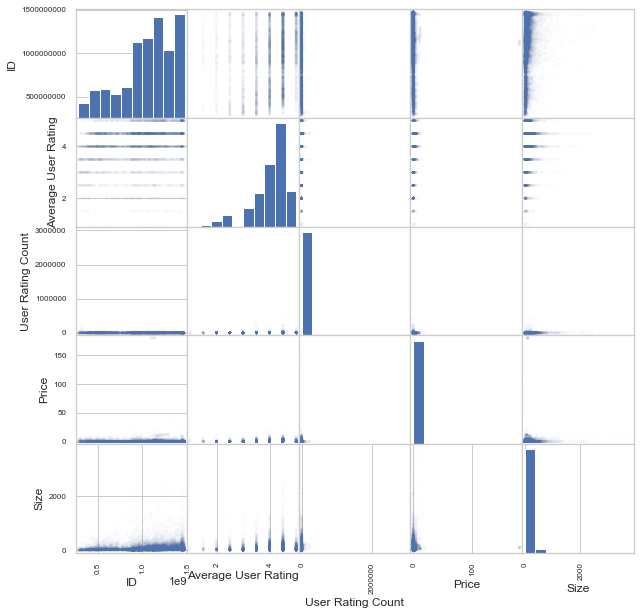

In [0]:

from pandas.plotting import scatter_matrix
scatter_matrix(game_data, alpha = .01, figsize = (10, 10))
pass

In [0]:
game_data.corr()

,ID,Average User Rating,User Rating Count,Price,Size
ID,1.000000,0.210280,-0.033052,-0.004187,0.143711
Average User Rating,0.210280,1.000000,0.033025,-0.000414,0.061617
User Rating Count,-0.033052,0.033025,1.000000,-0.011149,0.037736
Price,-0.004187,-0.000414,-0.011149,1.000000,0.033502
Size,0.143711,0.061617,0.037736,0.033502,1.000000


Коэффициэнты корреляции для числовых данных в диапазоне от -0.033 до 0.2, что говорит о том, что данные имеют слабые связи




In [0]:
categorical_cols=[x for x in game_data.columns if game_data[x].dtype=='object']
game_data[categorical_cols].describe()  # для категориальных


,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,Fortress Conquest,Emoji Stickers,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,14,2,943,17,123,11806,12467,16286,778,75,118


Выглядит немного странно, что не все название игр уникальны, возможно таблица содержит повторения.

In [0]:
game_data.Name.nunique()==game_data.ID.nunique()

True

Как мы можем заметить, дубликаты имеют полностью одинаковые значения по всем столбцам, поэтому мы можем просто удалить их без опасения потери данных

In [0]:
game_data[game_data.Name.duplicated(False)]



,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
15,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",117.136719,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
16,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",117.136719,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
56,302532668,Shogi Kifu,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",28.416992,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
57,302532668,Shogi Kifu,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",28.416992,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
123,321026028,Checkers,Checkers (Draughts) & puzzles.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,36581.0,0.00,NaN,"Checkers (also called ""Draughts"") is challengi...",Vintolo Ltd,4+,EN,66.178711,Games,"Games, Entertainment, Board, Strategy",4/07/2009,14/06/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16513,1460730256,Fire Boy - Water Girl,"Run, jump & hop on platforms",https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Start your island world adventure with the cra...,GUENNOUNI Othmane,4+,EN,163.188477,Games,"Games, Adventure, Strategy, Entertainment",26/04/2019,29/06/2019
16560,1462595486,Kiloton,Intelligence Learning Lab,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""KILOTON is a logic puzzle game, in the vein o...",V. Kevin Russ,4+,EN,76.633789,Games,"Games, Strategy, Puzzle",10/05/2019,20/05/2019
16561,1462595486,Kiloton,Intelligence Learning Lab,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""KILOTON is a logic puzzle game, in the vein o...",V. Kevin Russ,4+,EN,76.633789,Games,"Games, Strategy, Puzzle",10/05/2019,20/05/2019
16564,1462678041,Idle Bomber - Idle & Clicker,Boom Boom Boom,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,1.99,Boom! Boom! Boom!\n\nIdle Bomber - Idle & Clic...,Rafael Sian de Freitas,4+,EN,108.078125,Games,"Games, Strategy, Casual",8/05/2019,15/06/2019


In [0]:
game_data.drop_duplicates(subset="Name", inplace=True)

Рассмотрим распределение игр по производителю 

In [0]:
game_data.groupby(['Developer']).ID.count().nlargest(30)

Developer
Tapps Tecnologia da Informa\xe7\xe3o Ltda.    121
Vikash Patel                                  105
Netsummit Marketing, Inc.                      94
GabySoft                                       85
NetSummit Enterprises, Inc.                    77
Andrew Kudrin                                  62
MmpApps Corp.                                  61
Domyung Kim                                    57
Amy Prizer                                     46
Detention Apps                                 41
Qumaron                                        41
Gulfam Asghar                                  38
Anthony Hindle                                 37
HexWar Games Ltd                               37
Lazy Days, LLC                                 37
EASY Inc.                                      35
M&M App Services Pty Ltd                       35
Renato Erive                                   35
Tayga Games OOO                                35
Asfia sultana                           

# Визуализация данных

83.60% игр являются бесплатными.
7,615 (45.20%) игр имеют внутренние покупки.


Text(0.5, 1.0, 'Распределение стоимости игр')

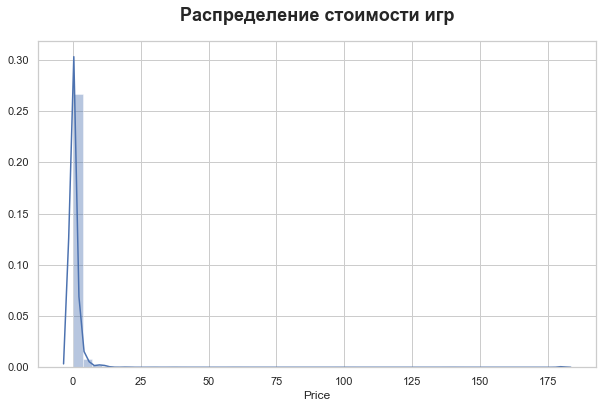

In [0]:
print('{:.2f}% игр являются бесплатными.'.format(game_data[game_data.Price==0].Price.count()/len(game_data)*100))
print('{:,} ({:.2f}%) игр имеют внутренние покупки.'.format(game_data['In-app Purchases'].notna().sum(),
                                                                  game_data['In-app Purchases'].notna().sum()/len(game_data)*100))

plt.figure(figsize=(10,6))
sns.distplot(game_data.Price.dropna())
plt.title('Распределение стоимости игр', fontweight='bold',fontsize=18, pad=20)

Существует очень слабая отрицательная корреляция между стоимостью игры и ее рейтингом, что подразумевает, что более дорогие игры получат более низкие рейтинги. Но в тоже время, много различных значений и выбросов, которые противоречат этому.

Большинство игр являются бесплатными, в тоже время чуть менее половины игр требуют внутриигровых денежных вложений. При этом разброс по стоимости довольно широк.

Text(0.5, 1.0, 'Отношение между ценой и средней оценкой пользователей')

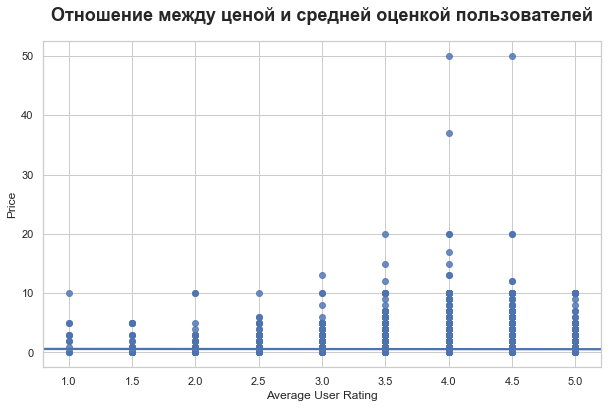

In [0]:
plt.figure(figsize=(10,6))
sns.regplot(x=game_data['Average User Rating'], y=game_data.Price.clip(0,50))
plt.title('Отношение между ценой и средней оценкой пользователей', fontweight='bold',fontsize=18, pad=20)


Игра с самым большим размером < Chess Raiders > - 3,820.03MB, Самая маленькая игра < "Sally's Spa HD" > - 0.05MB


Text(0.5, 1.0, 'Отношение размера игры и средней оценки пользователя')

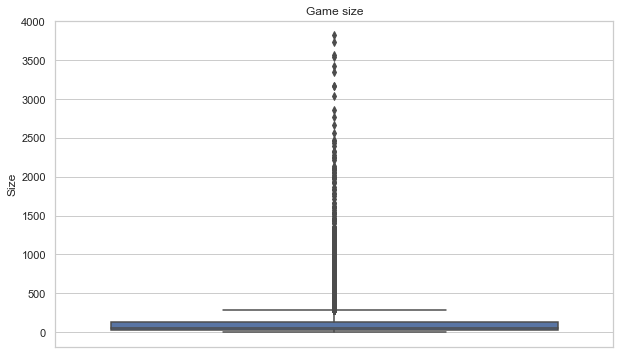

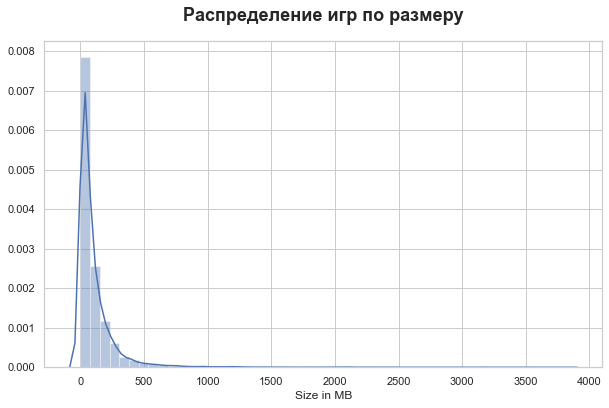

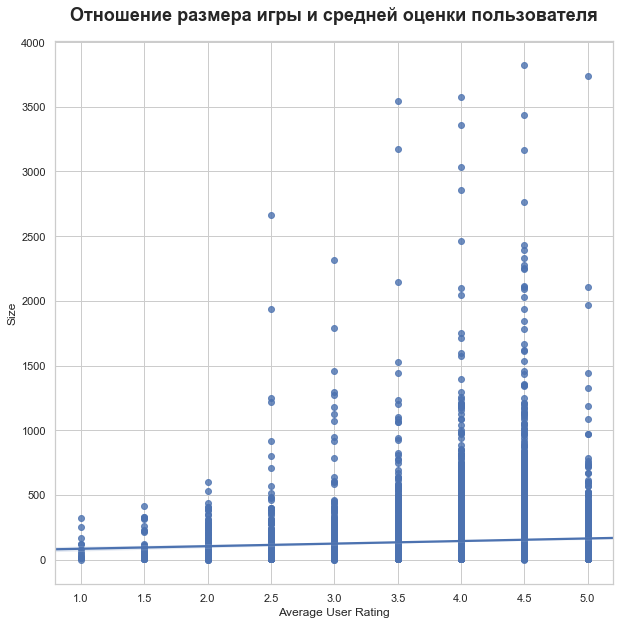

In [0]:
print('Игра с самым большим размером < {} > - {:,.2f}MB, Самая маленькая игра < {} > - {:.2f}MB'.format(game_data.Name.iloc[game_data.Size.idxmax()], game_data.Size.max(), game_data.Name.iloc[game_data.Size.idxmin()], game_data.Size.min()))
plt.figure(figsize=(10,6))
sns.boxplot(y=game_data.Size)
plt.title('Game size')

plt.figure(figsize=(10,6))
sns.distplot(game_data.Size.dropna())
plt.title('Распределение игр по размеру', fontweight='bold',fontsize=18, pad=20)
plt.xlabel('Size in MB')

plt.figure(figsize=(10,10))
sns.regplot(x=game_data['Average User Rating'],y=game_data['Size'])
plt.title('Отношение размера игры и средней оценки пользователя', fontweight='bold',fontsize=18, pad=20)

Кажется, между этими двумя показателями существует положительная корреляция: учитывая масштаб, более крупные игры, вероятно, будут давать более высокие рейтинги. Но она довольно слаба, так как большинство значений находятся далеко от линии регрессии, а игры почти всех размеров имеют рейтинг 4,5.

4+     11693
9+      2459
12+     2034
17+      661
Name: Age Rating, dtype: int64


Text(0.5, 1.0, 'Соотношение количества игр и возрастных ограничений')

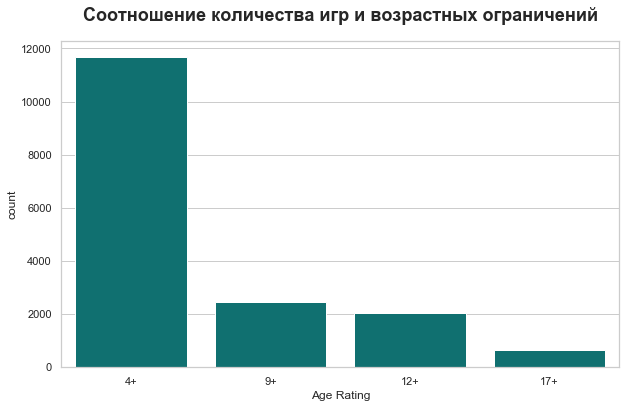

In [0]:
plt.figure(figsize=(10,6))
print(game_data['Age Rating'].value_counts())
sns.countplot(game_data['Age Rating'], color='teal')
plt.title('Соотношение количества игр и возрастных ограничений', fontweight='bold',fontsize=18, pad=20)

В большинство игр могут играть дети, которые чаще всего и выбирают данный вид времяпрепровождения.
В тоже время это свидетельствует об увеличении целевой аудитории при снижении возростных рейтингов.

Количество поддержки различных языков: 115
EN    16676
ZH     4945
DE     2576
FR     2503
ES     2399
      ...  
DZ        1
GD        1
FO        1
TT        1
GN        1
Length: 115, dtype: int64


Text(0.5, 1.0, 'Количество игр поддерживающих каждый язык')

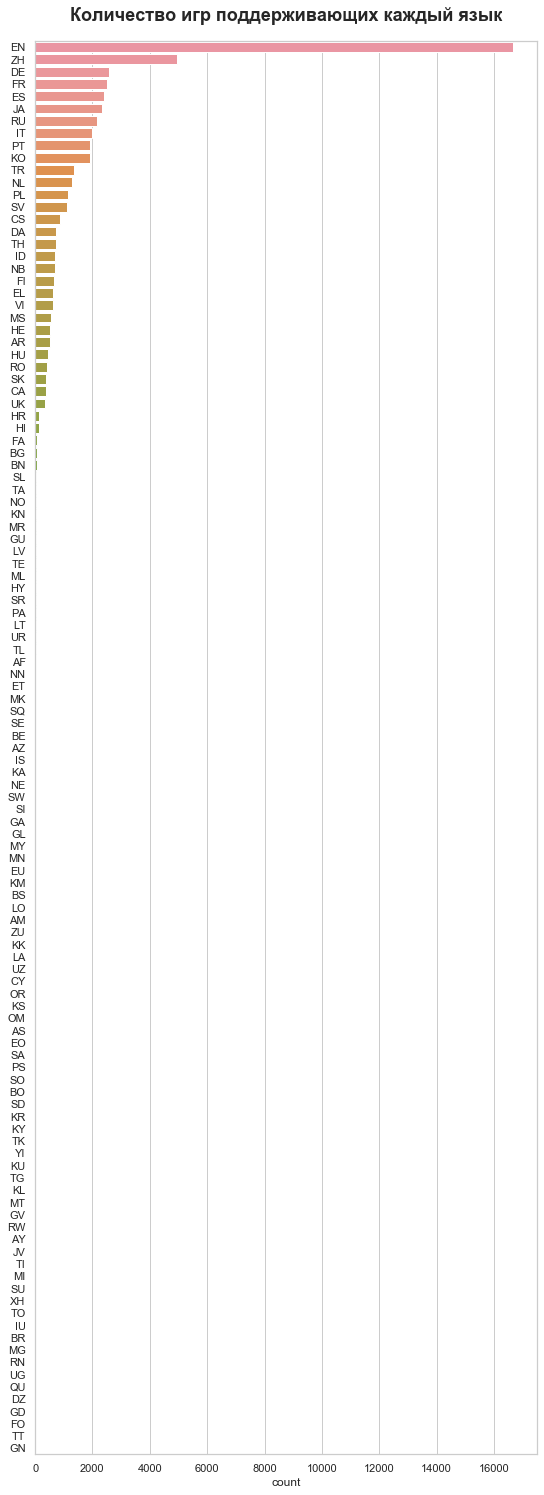

In [0]:
language_list=' '.join([x for x in game_data.Languages.dropna().values]).replace(',','').split()
languages=pd.Series(language_list)
print('Количество поддержки различных языков: {}'.format(languages.nunique()))
print(languages.value_counts())
plt.figure(figsize=(9,26))
sns.countplot(y=languages, order=languages.value_counts().index)
plt.title('Количество игр поддерживающих каждый язык', fontweight='bold',fontsize=18, pad=20)


Для многих пользователей это может стать критичным, если игра не поддерживает его родной язык (особенно, если учесть, данные с предыдущего графика о возрастных ограничениях, маленькие дети вряд ли владеют иностранным языком). Как мы можем заметить, чаще всего игры поддерживают английский, китайский, французский, испанский, немецкий и русский языки, как самые распространенные. При этом, например, на язык [курдов](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D1%80%D0%B4%D1%8B) переведена только одна игра. 

Text(0, 0.5, 'Count')

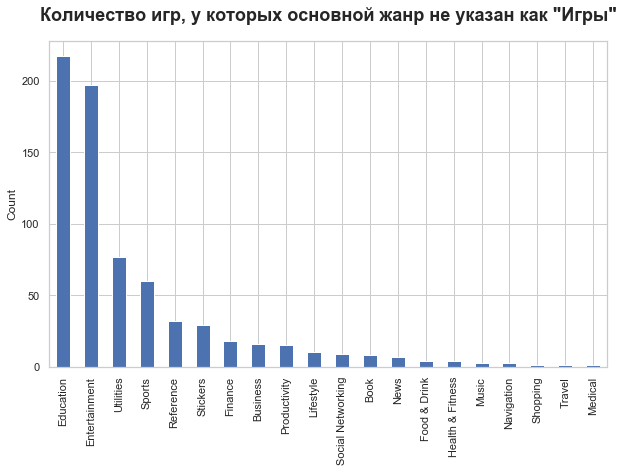

In [0]:
plt.figure(figsize=(10,6))
game_data[game_data['Primary Genre'] != 'Games']['Primary Genre'].value_counts().plot(kind='bar')
plt.title('Количество игр, у которых основной жанр не указан как "Игры"', fontweight='bold',fontsize=18, pad=20)
plt.ylabel('Count')

4.5    2832
4.0    1707
5.0     984
3.5     916
3.0     507
2.5     313
2.0     157
1.5      59
1.0      13
Name: Average User Rating, dtype: int64


Text(0.5, 1.0, 'Средний рейтинг')

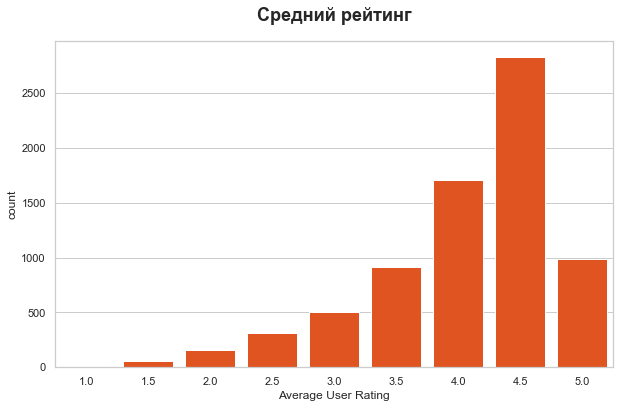

In [0]:
plt.figure(figsize=(10,6))
print(game_data['Average User Rating'].value_counts())
sns.countplot(game_data['Average User Rating'], color='orangered')
plt.title('Средний рейтинг', fontweight='bold',fontsize=18, pad=20)

Text(0.5, 1.0, 'Соотношение средней оценки пользователя и их количества')

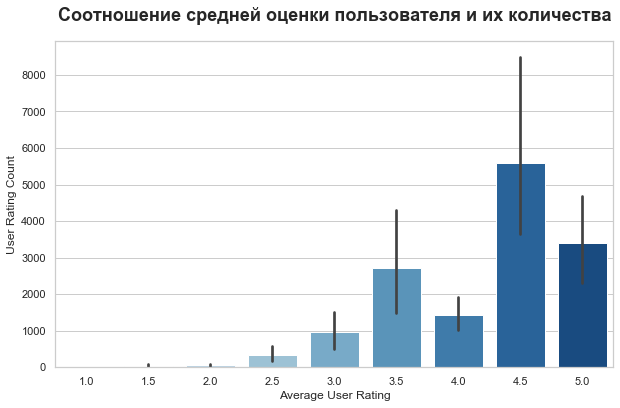

In [0]:
plt.figure(figsize=(10,6))
ratings=game_data[['Average User Rating','User Rating Count']].dropna()
sns.barplot(x=ratings['Average User Rating'], y=ratings['User Rating Count'], palette='Blues')
plt.title('Соотношение средней оценки пользователя и их количества', fontweight='bold',fontsize=18, pad=20)


Иконки игр с низким рейтингом

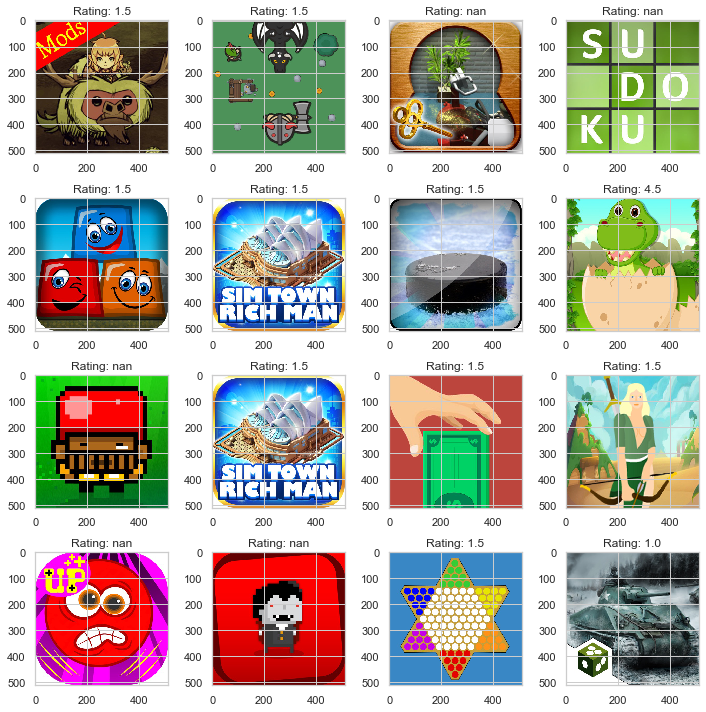

In [0]:
n = 4

fig, axs = plt.subplots(n, n, figsize= (10, 10), facecolor='white')

for i in range(0, n):
    for j in range(0, n):
        if abs(i - j) < 2:
            random_test_df = game_data[game_data['Average User Rating'] < 2]
            random_test_number = random_test_df.sample().reset_index()['index'][0]
        else:
            random_test_number = random.randint(0, len(game_data))
    
        display_url = game_data.loc[random_test_number, 'Icon URL']
        display_rating = game_data.loc[random_test_number, 'Average User Rating']

        res = requests.get(display_url)
        display_imm_arr = imageio.imread(io.BytesIO(res.content))
        axs[i][j].imshow(display_imm_arr, interpolation='nearest')
        axs[i][j].set_title(f"Rating: {display_rating}")
        
fig.tight_layout()
plt.show()


# Заполнение пропущенных значений и обработка категориальных признаков
* Price - т.к. большинство игр являются бесплатными, заполним недостающие значения 0.
* Size - заполним единственное недостающее значение медианой
* In-app Purchases - я думаю, что данные не указаны, потому что покупки в играх не предусмотрены. На мой взгляд данный признак не является важным в виде числовых значений, куда более важен сам факт необходимости что-то покупать в игре. Заменим ее на бинарный признак.
* Subtitle - аналогично In-app Purchases
* Age Rating, Primary Ganre - заменим с помощью dummy значений
* Ganres - содержит дуплицирующую информацию из поля Primary Ganre, не будем учитывать
* Developer - т.к. данный столбец имеет большое количество уникальных значений, то векторизация данного столбца не принесет нам большого успеха. Присвоим каждому разработчику игр уникальный ID.
* Description - тема для большого отдельного исследования, сегодня останется за рамками задачи
* Original Release Date и Current Version Release Date - не войдут в исследование
* Name, ID - эквивалентные данные, оставим только числовое.

In [0]:
prices = game_data['Price'].fillna(0)
sizes = game_data['Size'].fillna(game_data.Price.median())
purchases = game_data['In-app Purchases'].fillna('0')
game_data['has In-app Purchases'] = 0
game_data.at[purchases != '0', 'has In-app Purchases'] = 1
game_data['has In-app Purchases'].describe()


count    16847.000000
mean         0.451178
std          0.497625
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has In-app Purchases, dtype: float64

In [0]:
game_data.at[~game_data['Subtitle'].isnull(), 'Subtitle'] = 1
game_data.at[game_data['Subtitle'].isnull(), 'Subtitle'] = 0



In [0]:
age_ratings = pd.get_dummies(game_data['Age Rating'])
ganres = pd.get_dummies(game_data['Primary Genre'])

In [0]:
unique_developers = game_data.Developer.unique()
for idx, developer in enumerate(unique_developers):
  game_data.at[game_data['Developer'] == developer, 'Developer'] = idx
  

Нормализуем количественные значения

In [0]:
sizes = (sizes - sizes.mean(axis=0)) / sizes.std(axis=0)

In [0]:
prices = (prices - prices.mean(axis=0)) / prices.std(axis=0)

In [0]:
rc = game_data['User Rating Count'].fillna(0)
rc = (rc - rc.mean(axis=0)) / rc.std(axis=0)

rc.describe()

count    1.684700e+04
mean    -6.959076e-18
std      1.000000e+00
min     -5.175999e-02
25%     -5.175999e-02
50%     -5.175999e-02
75%     -5.066810e-02
max      1.067677e+02
Name: User Rating Count, dtype: float64

Соберем все данные вместе

Разделение выборки на тренировочную и тестовую

In [0]:
X = game_data[['ID','Developer','has In-app Purchases', 'Subtitle']]
X = pd.concat((X, sizes, prices, age_ratings, ganres, rc), axis=1)
X



,ID,Developer,has In-app Purchases,Subtitle,Size,Price,12+,17+,4+,9+,...,News,Productivity,Reference,Shopping,Social Networking,Sports,Stickers,Travel,Utilities,User Rating Count
0,284921427,0,0,0,-0.489228,0.276620,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.073384
1,284926400,1,0,0,-0.506478,0.149486,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.041757
2,284946595,2,0,0,-0.563518,-0.103511,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.243261
3,285755462,0,0,0,-0.461337,-0.103511,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.654327
4,285831220,3,0,0,-0.397040,0.276620,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.050774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,1474626442,8687,0,1,-0.249688,-0.103511,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.051760
17003,1474919257,8689,0,0,-0.026773,-0.103511,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.051760
17004,1474962324,8690,0,0,-0.453233,-0.103511,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.051760
17005,1474963671,8691,1,1,0.396144,-0.103511,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.051760


In [0]:
feature_names = X.columns
X = X.to_numpy()

In [0]:
y = np.array(game_data['Average User Rating'].fillna(0))
y = y.astype(int)# для приведения к номерам классов


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

13477 3370


# Запуск модели

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.394375602878979 55


Согласно данным подбора параметров, собранных с помощью кросс-валидации на 5 сабсетах, самым подходящим является классификатор с 55 соседями. Воспользуемся им для получения предсказания на тренировочной и тестовой выборках

In [0]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.39177858573866586 0.38991097922848666


Оценка на тренировочной выборке примерно равны. При этом риск ошибки довольно высок. Это говорит о том, что наши данные плохо сбалансированы. Будем использовать данный классификатор в качестве baseline для других классификаторов.

In [0]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.000445202938339393 0.43827893175074184


In [0]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.171513353115727


In [0]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in indices:
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[int(f)], importances[int(f)]))

Feature ranking:
32. feature 'User Rating Count' (0.560201)
 1. feature '   ID' (0.128682)
 2. feature 'Developer' (0.114713)
 5. feature ' Size' (0.108295)
 3. feature 'has In-app Purchases' (0.027860)
 6. feature 'Price' (0.018583)
 4. feature 'Subtitle' (0.011770)
 9. feature '   4+' (0.008960)
 7. feature '  12+' (0.005707)
10. feature '   9+' (0.004284)
17. feature 'Games' (0.002604)
 8. feature '  17+' (0.002327)
14. feature 'Entertainment' (0.001695)
13. feature 'Education' (0.000917)
31. feature 'Utilities' (0.000778)
25. feature 'Reference' (0.000664)
28. feature 'Sports' (0.000578)
24. feature 'Productivity' (0.000364)
19. feature 'Lifestyle' (0.000184)
12. feature 'Business' (0.000133)
15. feature 'Finance' (0.000128)
21. feature 'Music' (0.000104)
27. feature 'Social Networking' (0.000104)
11. feature ' Book' (0.000070)
23. feature ' News' (0.000067)
29. feature 'Stickers' (0.000064)
26. feature 'Shopping' (0.000042)
30. feature 'Travel' (0.000041)
20. feature 'Medical' (0.

In [0]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.23531157270029673


In [0]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.38480373970468207 0.3845697329376855


In [0]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0424426801216888 0.17270029673590503


Как мы видим, лучше всего с данной задачей справиляется случайные лес за счет объединения классификаторов в ансамбль и принятия решения с помощью голосования. Метод опорных векторов переобучился на тренировочных данных и поэтому мы видим настолько большую разницу между тренировочной и тестовой выборкой, это также вызвано несбалансированностью выборки.